In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
c =0.299792458
n =1.3195
v=c/n 
print(v)

0.2272015596816976


In [3]:
info_d = []
info_s = []
data_d = []
data_s = []

for i in range(0,10):
    name_dd = "../data/Tau05to15PeV_00{0}_data.npy".format(i)
    name_di = "../data/Tau05to15PeV_00{0}_info.pkl".format(i)
    name_sd = "../data/Electron05to15PeV_00{0}_data.npy".format(i)
    name_si = "../data/Electron05to15PeV_00{0}_info.pkl".format(i)
    info_d_temp = pickle.load(open(name_di, "rb"))
    info_s_temp = pickle.load(open(name_si, "rb"))
    data_d_temp = np.load(name_dd ,allow_pickle=True,encoding='bytes')
    data_s_temp = np.load(name_sd ,allow_pickle=True,encoding='bytes')
    info_d = info_d + info_d_temp
    info_s = info_s + info_s_temp
    data_d.append(data_d_temp)    
    data_s.append(data_s_temp)
data_d = np.vstack(data_d)
data_s = np.vstack(data_s)
info_d = np.array(info_d)
info_s = np.array(info_s)

In [4]:
print(info_d.shape, data_d.shape)
print(info_s.shape, data_s.shape)
print(type(data_d_temp[0][0][0]))

(10062,) (10062, 300, 60)
(24019,) (24019, 300, 60)
<class 'numpy.float64'>


In [5]:
print(np.amax(data_d))
print(np.amin(data_d))
print(np.amax(data_s))
print(np.amin(data_s))

6.405907616717559e-09
-5.962297593924894e-11
6.883592770365534e-09
-6.128851422642174e-11


In [6]:
label_d = np.ones(len(data_d))
label_s = np.zeros(len(data_s))
print(label_d.shape)
print(label_s.shape)
print(label_d[0])
print(label_s[0])

(10062,)
(24019,)
1.0
0.0


(34081, 300, 60)
(34081,)
1.0


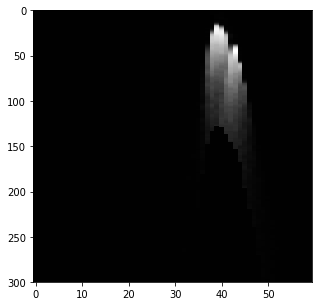

In [7]:
data = np.concatenate((data_d, data_s), axis = 0) 
label = np.concatenate((label_d, label_s), axis = 0) 
print(data.shape)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.imshow(data[2], interpolation='nearest', aspect='auto', cmap= 'gray')
print(label.shape)
print(label[2])

In [8]:
from sklearn.utils import shuffle

(34081, 300, 60) (34081,)
1.0


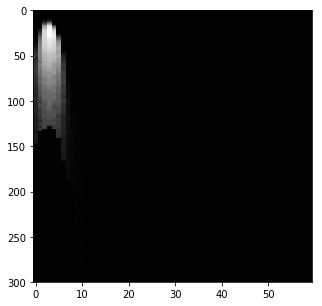

In [9]:
data, label = shuffle(data, label, random_state = 12)
print(data.shape, label.shape)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.imshow(data[2], interpolation='nearest', aspect='auto', cmap= 'gray')
print(label[2])

In [10]:
train_data = data[:26000]
train_label = label[:26000]
train_data = train_data.reshape((len(train_data),300,60,1))
train_data = train_data.astype('float32')/10**-8

valid_data = data[26000:30000]
valid_label = label[26000:30000]
valid_data = valid_data.reshape((len(valid_data),300,60,1))
valid_data = valid_data.astype('float32')/10**-8

test_data = data[30000:]
test_label = label[30000:]
test_data = test_data.reshape((len(test_data),300,60,1))
test_data = test_data.astype('float32')/10**-8

In [11]:
print(np.amax(train_data))
print(np.amin(train_data))

0.68835926
-0.006117019


In [12]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [13]:
#for im in data_d[:100]:
#    print(im.shape)
#    fig = plt.figure(figsize=(12, 12))
#    ax = fig.add_subplot(111)
#    ax.imshow(im, interpolation='nearest', aspect='auto', cmap= 'gray')
    #ax.plot(im[14,:])
    #print(im[:,46])

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(300, 60, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

W0704 16:04:08.583938 139682155157248 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0704 16:04:08.606980 139682155157248 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 16:04:08.610152 139682155157248 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 16:04:08.629062 139682155157248 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 296, 56, 32)       832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 28, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 26, 32)       9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 5, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 11200)             0         
__________

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer="rmsprop",
              metrics=['acc'])

W0704 16:04:11.199079 139682155157248 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0704 16:04:11.226514 139682155157248 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0704 16:04:11.232788 139682155157248 deprecation.py:323] From /home/dup193/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
history = model.fit(train_data,train_label, epochs=20, validation_data=(valid_data,valid_label), batch_size =128)

W0704 16:04:15.963875 139682155157248 deprecation_wrapper.py:119] From /home/dup193/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 26000 samples, validate on 4000 samples
Epoch 1/20
26000/26000 [==============================] - 105s 4ms/step - loss: 0.6058 - acc: 0.7045 - val_loss: 0.5952 - val_acc: 0.7015
Epoch 2/20
26000/26000 [==============================] - 104s 4ms/step - loss: 0.5853 - acc: 0.7070 - val_loss: 0.5810 - val_acc: 0.7027
Epoch 3/20
26000/26000 [==============================] - 104s 4ms/step - loss: 0.5737 - acc: 0.7153 - val_loss: 0.5698 - val_acc: 0.7205
Epoch 4/20
26000/26000 [==============================] - 104s 4ms/step - loss: 0.5604 - acc: 0.7270 - val_loss: 0.5690 - val_acc: 0.7245
Epoch 5/20
26000/26000 [==============================] - 104s 4ms/step - loss: 0.5438 - acc: 0.7417 - val_loss: 0.5524 - val_acc: 0.7350
Epoch 6/20
26000/26000 [==============================] - 104s 4ms/step - loss: 0.5273 - acc: 0.7545 - val_loss: 0.5828 - val_acc: 0.7302
Epoch 7/20
26000/26000 [==============================] - 104s 4ms/step - loss: 0.5103 - acc: 0.7673 - val_loss: 0.5744 - v

In [17]:
model.save('DP_first_model.h5')

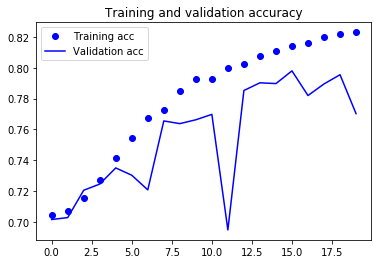

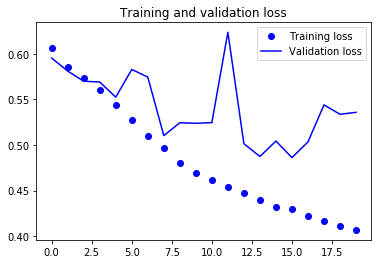

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
result = model.evaluate(test_data,test_label)
print(result)

4081/4081 [==============================] - 4s 873us/step
[0.5269325043795243, 0.7760352855276693]
